## 2.1 Data Manipulation

In [2]:
import torch

In [6]:
x = torch.arange(12, dtype=torch.float32)
x

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [7]:
x.numel() # num elements; presumably

12

In [8]:
len(x)

12

In [11]:
x.shape # no brackets! it's an attribute of the tensor not a method.

torch.Size([12])

In [12]:
X = x.reshape(3, 4) # == x.reshape(3, -1) == x.reshape(-1, 4)
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

In [13]:
torch.zeros((2,3,4))

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [16]:
torch.ones((2,3,4)), len(torch.ones((2,3,4))) # seems that length is just along the 0th axis.

(tensor([[[1., 1., 1., 1.],
          [1., 1., 1., 1.],
          [1., 1., 1., 1.]],
 
         [[1., 1., 1., 1.],
          [1., 1., 1., 1.],
          [1., 1., 1., 1.]]]),
 2)

In [17]:
torch.randn(3,4) # standard deviation = 1, mean = 0

tensor([[-0.8725,  1.0880,  2.1401,  0.2476],
        [ 0.9554,  0.5242, -1.0524, -2.1604],
        [ 0.5442,  0.0042,  0.6839,  0.7259]])

In [18]:
X[-1], X[1:3] # applied along axis 0.

(tensor([ 8.,  9., 10., 11.]),
 tensor([[ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]]))

In [19]:
X[1, 2] = 17
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5., 17.,  7.],
        [ 8.,  9., 10., 11.]])

In [21]:
X[:2, :] = 12
X

tensor([[12., 12., 12., 12.],
        [12., 12., 12., 12.],
        [ 8.,  9., 10., 11.]])

In [22]:
torch.exp(x)

tensor([162754.7969, 162754.7969, 162754.7969, 162754.7969, 162754.7969,
        162754.7969, 162754.7969, 162754.7969,   2980.9580,   8103.0840,
         22026.4648,  59874.1406])

In [24]:
X = torch.arange(12, dtype=torch.float32).reshape((3,4))
Y = torch.tensor([[2.0,1,4,3], [1,2,3,4], [4,3,2,1]])
torch.cat((X,Y), dim=0), torch.cat((X,Y), dim=1)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 2.,  1.,  4.,  3.],
         [ 1.,  2.,  3.,  4.],
         [ 4.,  3.,  2.,  1.]]),
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
         [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
         [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]))

In [29]:
X == Y, X < Y, X > Y, X >= Y, X <= Y

(tensor([[False,  True, False,  True],
         [False, False, False, False],
         [False, False, False, False]]),
 tensor([[ True, False,  True, False],
         [False, False, False, False],
         [False, False, False, False]]),
 tensor([[False, False, False, False],
         [ True,  True,  True,  True],
         [ True,  True,  True,  True]]),
 tensor([[False,  True, False,  True],
         [ True,  True,  True,  True],
         [ True,  True,  True,  True]]),
 tensor([[ True,  True,  True,  True],
         [False, False, False, False],
         [False, False, False, False]]))

In [30]:
X.sum()

tensor(66.)

In [32]:
a = torch.arange(3).reshape((3,1))
b = torch.arange(2).reshape((1,2))
a, b

(tensor([[0],
         [1],
         [2]]),
 tensor([[0, 1]]))

In [33]:
a + b

tensor([[0, 1],
        [1, 2],
        [2, 3]])

In [36]:
before = id(Y)
Y = Y + X
id(Y) == before

False

In [39]:
Z = torch.zeros_like(Y)
print('id(Z):', id(Z))
Z[:] = X + Y
print('id(Z):', id(Z))

id(Z): 132091087213568
id(Z): 132091087213568


In [42]:
before = id(X)
X += Y
id(X) == before

True

In [43]:
A = X.numpy()
B = torch.from_numpy(A)
type(A), type(B)

(numpy.ndarray, torch.Tensor)

In [44]:
a = torch.tensor([3.5])
a, a.item(), float(a), int(a)

(tensor([3.5000]), 3.5, 3.5, 3)

In [56]:
d = torch.arange(16).reshape((4,2,-1))
e = torch.arange(2) # I do not understand n-dimensional broadcasting!
d, e, d + e

(tensor([[[ 0,  1],
          [ 2,  3]],
 
         [[ 4,  5],
          [ 6,  7]],
 
         [[ 8,  9],
          [10, 11]],
 
         [[12, 13],
          [14, 15]]]),
 tensor([0, 1]),
 tensor([[[ 0,  2],
          [ 2,  4]],
 
         [[ 4,  6],
          [ 6,  8]],
 
         [[ 8, 10],
          [10, 12]],
 
         [[12, 14],
          [14, 16]]]))

## 2.2 Data Preprocessing

In [57]:
import os

os.makedirs(os.path.join('..', 'data'), exist_ok=True)
data_file = os.path.join('..', 'data', 'house_tiny.csv')
with open(data_file, 'w') as f:
    f.write('''NumRooms,RoofType,Price
    NA,NA,127500
    2,NA,106000
    4,Slate,178100
    NA,NA,140000''')

In [58]:
import pandas as pd
data = pd.read_csv(data_file)
print(data)

  NumRooms RoofType   Price
0       NA      NaN  127500
1        2      NaN  106000
2        4    Slate  178100
3       NA      NaN  140000


In [60]:
inputs , targets = data.iloc[:, 0:-1], data.iloc[:, -1]
inputs = pd.get_dummies(inputs, dummy_na=True)
print(inputs)

   NumRooms_    2  NumRooms_    4  NumRooms_    NA  NumRooms_nan  \
0           False           False             True         False   
1            True           False            False         False   
2           False            True            False         False   
3           False           False             True         False   

   RoofType_Slate  RoofType_nan  
0           False          True  
1           False          True  
2            True         False  
3           False          True  


In [61]:
inputs = inputs.fillna(inputs.mean())
print(inputs)

   NumRooms_    2  NumRooms_    4  NumRooms_    NA  NumRooms_nan  \
0           False           False             True         False   
1            True           False            False         False   
2           False            True            False         False   
3           False           False             True         False   

   RoofType_Slate  RoofType_nan  
0           False          True  
1           False          True  
2            True         False  
3           False          True  


In [62]:
X = torch.tensor(inputs.to_numpy(dtype=float))
y = torch.tensor(targets.to_numpy(dtype=float))
X, y

(tensor([[0., 0., 1., 0., 0., 1.],
         [1., 0., 0., 0., 0., 1.],
         [0., 1., 0., 0., 1., 0.],
         [0., 0., 1., 0., 0., 1.]], dtype=torch.float64),
 tensor([127500., 106000., 178100., 140000.], dtype=torch.float64))

## 2.3 Linear Algebra

In [66]:
A = torch.arange(6).reshape(2,-1)
A.T

tensor([[0, 3],
        [1, 4],
        [2, 5]])

In [67]:
B = A.clone()
B

tensor([[0, 1, 2],
        [3, 4, 5]])

In [69]:
A * B # hadamard product

tensor([[ 0,  1,  4],
        [ 9, 16, 25]])

In [81]:
A, A.sum(axis=0), A.sum(axis=1)

(tensor([[0, 1, 2],
         [3, 4, 5]]),
 tensor([3, 5, 7]),
 tensor([ 3, 12]))

In [82]:
sum_A = A.sum(axis=1, keepdims=True)
sum_A, sum_A.shape

(tensor([[ 3],
         [12]]),
 torch.Size([2, 1]))

In [83]:
# an artifact of maintaining the shape is:
A / sum_A # where now the rows sum to 1.

tensor([[0.0000, 0.3333, 0.6667],
        [0.2500, 0.3333, 0.4167]])

In [84]:
A.cumsum(axis=0)

tensor([[0, 1, 2],
        [3, 5, 7]])

In [88]:
y = torch.ones(3, dtype = torch.float32)
x = torch.arange(3, dtype=torch.float32)
x, y, torch.dot(x, y)

(tensor([0., 1., 2.]), tensor([1., 1., 1.]), tensor(3.))

In [89]:
torch.sum(x*y) # equiv to the dot product.

tensor(3.)

In [92]:
x = torch.arange(3, )
A.shape, x.shape, torch.mv(A, x), A@x # mv -> matrix vector multiplication.

(torch.Size([2, 3]), torch.Size([3]), tensor([ 5, 14]), tensor([ 5, 14]))

In [101]:
B = torch.ones((3,4), dtype=torch.int64) # i need to be more careful about the initialisation data types.
torch.mm(A, B), A@B

(tensor([[ 3,  3,  3,  3],
         [12, 12, 12, 12]]),
 tensor([[ 3,  3,  3,  3],
         [12, 12, 12, 12]]))

In [102]:
u = torch.tensor([3.0,-4.0])
torch.norm(u)

tensor(5.)

In [103]:
torch.abs(u).sum()

tensor(7.)

In [3]:
torch.norm(torch.ones((4,9)))

tensor(6.)

## 2.4 Calculus

In [6]:
%matplotlib inline
import numpy as np
from matplotlib_inline import backend_inline
from d2l import torch as d2l

In [7]:
def f(x):
    return 3 * x ** 2 - 4 * x

In [11]:
for h in 10.0**np.arange(-1,-6,-1):
    print(f'h={h:.5f},numerical limit={(f(1+h)-f(1))/h:.5f}')

h=0.10000,numerical limit=2.30000
h=0.01000,numerical limit=2.03000
h=0.00100,numerical limit=2.00300
h=0.00010,numerical limit=2.00030
h=0.00001,numerical limit=2.00003


In [12]:
#@save
def use_svg_display():
    """Use the svg format to display a plot in Jupyter"""
    backend_inline.set_matplotlib_formats('svg')

In [14]:
def set_figsize(figsize=(3.5, 2.5)): #@save
    """set the figure size for matplotlib"""
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize

In [15]:
#@save
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """set the axes for matplotlib"""
    axes.set_xlabel(xlabel), axes.set_ylabel(ylabel)
    axes.set_xscale(xscale), axes.set_yscale(yscale)
    axes.set_xlim(xlim),     axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

In [21]:
#@save
def plot(X, Y=None, xlabel=None, ylabel=None, legend=[], xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """plot data points"""
    def has_one_axis(X): # true if X (tensor or list) has 1 axis
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list)
                and not hasattr(X[0], "__len__"))

    if has_one_axis(X): X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)

    set_figsize(figsize)
    if axes is None:
        axes = d2l.plt.gca()

    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        axes.plot(x,y,fmt) if len(x) else axes.plot(y, fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

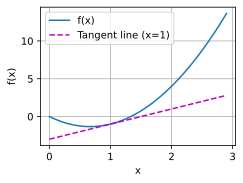

In [22]:
x = np.arange(0, 3, 0.1)
plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

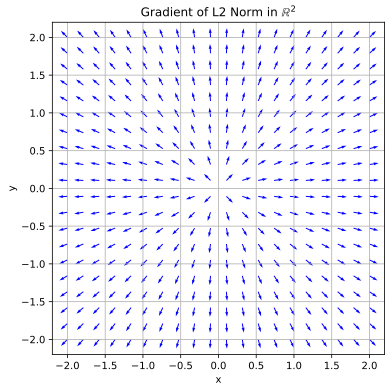

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# L2 norm function
def l2_norm(x):
    return np.linalg.norm(x)

# Gradient of L2 norm (undefined at origin, so we handle that)
def grad_l2_norm(x):
    norm = np.linalg.norm(x)
    if norm == 0:
        return np.array([0.0, 0.0])  # or raise an exception
    return x / norm

# Create a grid of points in R2
x_vals = np.linspace(-2, 2, 20)
y_vals = np.linspace(-2, 2, 20)
X, Y = np.meshgrid(x_vals, y_vals)
U = np.zeros_like(X)
V = np.zeros_like(Y)

# Compute gradient vectors
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        point = np.array([X[i, j], Y[i, j]])
        grad = grad_l2_norm(point)
        U[i, j], V[i, j] = grad[0], grad[1]

# Plot the vector field
plt.figure(figsize=(6, 6))
plt.quiver(X, Y, U, V, color='blue')
plt.title('Gradient of L2 Norm in $\\mathbb{R}^2$')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.gca().set_aspect('equal')
plt.show()
# notice that the gradients are all pointing in the direction of _steepest ascent_.
# with loss functions we would step in the negative of this direction, 
# i.e. towards the centre; dragging weights to 0 as expected.

## 2.5 Automatic Differentiation

In [32]:
x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

In [33]:
x.requires_grad_(True) # notice the dunder after grad!
x.grad

In [34]:
y = 2 * torch.dot(x, x)
y

tensor(28., grad_fn=<MulBackward0>)

In [35]:
y.backward()

In [37]:
x

tensor([0., 1., 2., 3.], requires_grad=True)

In [38]:
x.grad

tensor([ 0.,  4.,  8., 12.])

In [39]:
x.grad.zero_() # dunder again; resets the gradient -- important to do!
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

In [40]:
x.grad.zero_()
y = x*x
y.backward(gradient=torch.ones(len(y))) # faster is y.sum().backward()
x.grad

tensor([0., 2., 4., 6.])

In [41]:
x.grad.zero_()
y = x*x
u = y.detach()
z = u*x
z.sum().backward()
x.grad == u

tensor([True, True, True, True])

In [43]:
x.grad.zero_()
y.sum().backward()
x.grad == 2 * x

tensor([True, True, True, True])

In [44]:
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c
        

In [45]:
a = torch.randn(size=(), requires_grad=True) # note no dunder!
d = f(a)
d.backward()

In [46]:
a.grad == d / a

tensor(True)